# Gathering Data for this Project

In [3]:
import pandas as pd
import numpy as np
import requests 
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from scipy.stats import zscore


1.- Twitter API code to gather some of the required data for this project:

In [143]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

In [144]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [154]:
#tweets = pd.read_csv('tweet-json.txt', sep='\t')
twitter_json= pd.read_json('tweet_json.txt', lines=True)
twitter_arch = pd.read_csv('twitter_archive_enhanced.csv')


In [119]:
tweet_ids = twitter_arch.tweet_id.values
len(tweet_ids)

2356

In [10]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

KeyboardInterrupt: 

In [146]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
url_content = response.content
csv_file = open('image_prediction.csv', 'wb')
csv_file.write(url_content)


335079

In [147]:
print(url)

https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv


In [148]:
image_prediction = pd.read_csv('image_prediction.csv', sep='\t')

# Assessing Data for this Project

In [155]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [156]:
twitter_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [157]:
twitter_json.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [158]:
twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [159]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [160]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [161]:
twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [162]:
twitter_json[twitter_json.geo != 'NaN']

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [163]:
#I´ll check what columns are duplicated 
all_columns = pd.Series(list(image_prediction) + list(twitter_json) + list(twitter_arch))
all_columns[all_columns.duplicated()]

43                 tweet_id
44    in_reply_to_status_id
45      in_reply_to_user_id
47                   source
dtype: object

In [164]:
image_prediction.tweet_id.value_counts()

700151421916807169    1
740373189193256964    1
836989968035819520    1
816336735214911488    1
688828561667567616    1
                     ..
675354435921575936    1
759923798737051648    1
705475953783398401    1
693231807727280129    1
817056546584727552    1
Name: tweet_id, Length: 2075, dtype: int64

In [165]:
twitter_arch.tweet_id.value_counts()

700151421916807169    1
674764817387900928    1
794926597468000259    1
701570477911896070    1
715220193576927233    1
                     ..
674742531037511680    1
756651752796094464    1
743545585370791937    1
770655142660169732    1
749075273010798592    1
Name: tweet_id, Length: 2356, dtype: int64

In [166]:
twitter_json.id.value_counts()

700151421916807169    1
713175907180089344    1
754482103782404096    1
699446877801091073    1
794926597468000259    1
                     ..
674742531037511680    1
756651752796094464    1
743545585370791937    1
770655142660169732    1
749075273010798592    1
Name: id, Length: 2354, dtype: int64

In [167]:
#I will check if image_prediction and twitter_arch have the same data according to the tweet id. So I´ll use the data contein in both dataframes.
all_twits_id = pd.Series(list(image_prediction.tweet_id) + list(twitter_arch.tweet_id))
all_twits_id[all_twits_id.duplicated()]

2075    892420643555336193
2076    892177421306343426
2077    891815181378084864
2078    891689557279858688
2079    891327558926688256
               ...        
4426    666049248165822465
4427    666044226329800704
4428    666033412701032449
4429    666029285002620928
4430    666020888022790149
Length: 2075, dtype: int64

<AxesSubplot:>

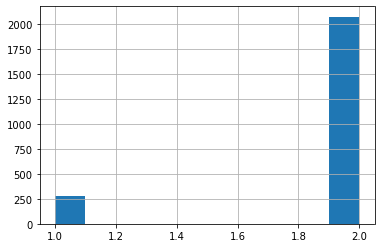

In [168]:
all_twits_id.value_counts().hist()

In [169]:
all_twits_id.duplicated().sum()

2075

In [170]:
image_prediction.isnull().count()

tweet_id    2075
jpg_url     2075
img_num     2075
p1          2075
p1_conf     2075
p1_dog      2075
p2          2075
p2_conf     2075
p2_dog      2075
p3          2075
p3_conf     2075
p3_dog      2075
dtype: int64

In [171]:
sum(twitter_json.id.isnull())

0

In [172]:
sum(twitter_arch.text.isnull())

0

In [173]:
twitter_arch[twitter_arch.rating_numerator>20].rating_numerator.count()

24

In [174]:
twitter_arch[twitter_arch.rating_numerator<10].rating_numerator.value_counts()

9    158
8    102
7     55
5     37
6     32
3     19
4     17
1      9
2      9
0      2
Name: rating_numerator, dtype: int64

In [175]:
twitter_arch[twitter_arch.rating_numerator>20].rating_numerator.value_counts()

420     2
75      2
960     1
44      1
27      1
666     1
121     1
24      1
26      1
182     1
84      1
50      1
1776    1
88      1
143     1
45      1
204     1
144     1
80      1
165     1
99      1
60      1
Name: rating_numerator, dtype: int64

In [176]:
#I´ll check if all rows have a denominator equal to 10
twitter_arch[twitter_arch.rating_denominator != 10].rating_denominator


313       0
342      15
433      70
516       7
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64

In [177]:
twitter_arch[twitter_arch.rating_denominator != 10].rating_denominator.value_counts()


50     3
11     3
20     2
80     2
0      1
110    1
120    1
150    1
15     1
16     1
130    1
170    1
40     1
7      1
70     1
2      1
90     1
Name: rating_denominator, dtype: int64

In [178]:
twitter_arch[twitter_arch.rating_denominator != 10].rating_denominator.count()


23

In [179]:
sum(twitter_arch.rating_denominator.isnull())

0

In [180]:
sum(twitter_arch.rating_numerator.isnull())

0

In [181]:
#Now i´ll check the data related to dog stages: doggo, floofer, pupper and puppo
twitter_arch[twitter_arch.doggo != 'None'].doggo.describe()

count        97
unique        1
top       doggo
freq         97
Name: doggo, dtype: object

In [182]:
twitter_arch[twitter_arch.floofer != 'None'].floofer.describe()

count          10
unique          1
top       floofer
freq           10
Name: floofer, dtype: object

In [183]:
twitter_arch[twitter_arch.pupper != 'None'].pupper.describe()

count        257
unique         1
top       pupper
freq         257
Name: pupper, dtype: object

In [184]:
twitter_arch[twitter_arch.puppo != 'None'].puppo.describe()

count        30
unique        1
top       puppo
freq         30
Name: puppo, dtype: object

In [275]:
twitter_arch[twitter_arch.name != 'None'].name.describe()

count     1611
unique     956
top          a
freq        55
Name: name, dtype: object

In [269]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [507]:
sum(twitter_arch.name.isna())

0

In [314]:
sum(twitter_arch.name == 'a')

55

In [315]:
sum(twitter_arch.name == 'the')

8

In [358]:
sum(twitter_arch.name == 'None')

745

In [276]:
twitter_arch[twitter_arch.name != 'None'].name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'Jax', 'Zoey',
       'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', 'Quinn', 

In [185]:
sum(twitter_arch.expanded_urls.isna())

59

In [186]:
sum(twitter_json.favorite_count.isnull())

0

In [392]:
twitter_arch.retweeted_status_id.nunique()

181

In [394]:
sum(twitter_arch.retweeted_status_id.isnull())

2175

## At least 8 Quality issues 

image_predicion
- tweet_id should is an int variable. It Should be object.

twitter_arch 
- tweet_id is an int variable, in_reply_to_status_id and in_reply_to_user_id,  retweeted_status_id retweeted_status_user_id are floats. All of these should be objects.    
- timestamp column is an object variable. Should be a datetime
- rating_numerator and Rating_denominator should be re-extracted from the text column. 
- rating_numerator should be a float.
- In name column , there are several values that are not dogs name.
- This columns are useless: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.
- Eliminate rows that contains retweet.

twitter_json
- id and id_str column are int variables,  in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, quoted_status_id and quoted_status_id_str are floats. All of these should be objects.
- Missing data in columns 'geo', 'coordinates', 'place', 'contributors' (also, I won´t use this data)  
- Not nessesary retweet information, so eliminate these columns: retweeted_status, quoted_status_id, quoted_status_id_str, quoted_status 
- possibly_sensitive and possibly_sensitive_appealable are floats, but should be boolean. (also, I won´t use this data)            

General 
- There are duplicated columns like: id, tweet_id, in_reply_to_status_id, in_reply_to_user_id, source, etc



# At least 2 tidiness issues


- All data that I´ll analyse will be in one dataframe. 
- Remove columns that will not be use.
- twitter_arch should have onle one column for stages of dog:  doggo, pupper, puppo, and floofer.




# CLEAN

# Tidiness

In [1272]:
twitter_arch_clean = twitter_arch.copy()
twitter_json_clean = twitter_json.copy()
image_prediction_clean = image_prediction.copy()

### Define

#### 1) Create just one column for doggo, floofer, pupper and puppo columns called dog_stage column

### Code

In [1273]:
# handle none
twitter_arch_clean.doggo.replace('None', '', inplace=True)
twitter_arch_clean.floofer.replace('None', '', inplace=True)
twitter_arch_clean.pupper.replace('None', '', inplace=True)
twitter_arch_clean.puppo.replace('None', '', inplace=True)

# merge into column
twitter_arch_clean['dog_stage'] = twitter_arch_clean.doggo + twitter_arch_clean.floofer + twitter_arch_clean.pupper + twitter_arch_clean.puppo

# handle multiple stages
twitter_arch_clean.loc[twitter_arch_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'multiple'
twitter_arch_clean.loc[twitter_arch_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'multiple'
twitter_arch_clean.loc[twitter_arch_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'multiple'

# handle missing values
twitter_arch_clean.loc[twitter_arch_clean.dog_stage == '', 'dog_stage'] = 'None'



### Test

In [1274]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [1275]:
twitter_arch_clean.sample(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
792,773670353721753600,NaN,NaN,2016-09-07 23:52:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shakespeare. He appears to be maximum ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773670353...,10,10,Shakespeare,,,,,None
850,765719909049503744,NaN,NaN,2016-08-17 01:20:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brat. He has a hard time being ferocio...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765719909...,12,10,Brat,,,,,None
1342,704819833553219584,NaN,NaN,2016-03-02 00:05:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chesterson. He's a Bolivian Scoop Dog....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704819833...,7,10,Chesterson,,,,,None
474,816091915477250048,NaN,NaN,2017-01-03 01:20:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Comet. He's a Wild Estonian Poofer. Su...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816091915...,12,10,Comet,,,,,None
1756,678767140346941444,NaN,NaN,2015-12-21 02:41:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She makes awful decisions. 8/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678767140...,8,10,Mia,,,,,None
325,833863086058651648,NaN,NaN,2017-02-21 02:17:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. Hairbrushes are his favorite ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/833863086...,12,10,Bentley,,,,,None
2032,671763349865160704,NaN,NaN,2015-12-01 18:50:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mark. He's a good dog. Always rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671763349...,9,10,Mark,,,,,None
1745,679148763231985668,NaN,NaN,2015-12-22 03:57:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know everyone's excited for Christmas but th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679148763...,8,10,None,,,,,None
2186,668981893510119424,NaN,NaN,2015-11-24 02:38:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Oddly shaped tail. Long pink ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668981893...,4,10,None,,,,,None
616,796484825502875648,NaN,NaN,2016-11-09 22:49:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy doggo that requested some assi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/796484825...,12,10,None,doggo,,,,doggo


In [1276]:
sum(twitter_arch_clean.dog_stage.value_counts())


2356

In [1277]:
twitter_arch_clean.dog_stage.value_counts()

None        1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
Name: dog_stage, dtype: int64

In [1278]:
sum(twitter_arch_clean.dog_stage.isna())

0

In [1279]:
sum(twitter_arch_clean.tweet_id.duplicated())

0

### Define

### 2) Merge image_prediction with twitter_arch

### Code

In [1280]:
twitter_arch_clean = pd.merge(image_prediction_clean, twitter_arch_clean,
                            on=['tweet_id'], how='left')

#### Test

In [1281]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2075 non-null   int64  
 1   jpg_url                     2075 non-null   object 
 2   img_num                     2075 non-null   int64  
 3   p1                          2075 non-null   object 
 4   p1_conf                     2075 non-null   float64
 5   p1_dog                      2075 non-null   bool   
 6   p2                          2075 non-null   object 
 7   p2_conf                     2075 non-null   float64
 8   p2_dog                      2075 non-null   bool   
 9   p3                          2075 non-null   object 
 10  p3_conf                     2075 non-null   float64
 11  p3_dog                      2075 non-null   bool   
 12  in_reply_to_status_id       23 non-null     float64
 13  in_reply_to_user_id         23 no


### Define



#### 3) Merge twitter_arch_clean with twitter_json favorite_count column to only analyse data that has all the information related to one ID

### Code

In [1282]:
twitter_json_clean = twitter_json_clean.drop(columns = ['id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'lang'], axis = 1) 
twitter_json_clean = twitter_json_clean.rename(columns={'created_at':'timestamp', 'id':'tweet_id'})
twitter_arch_clean = pd.merge(twitter_arch_clean, twitter_json_clean,
                            on=['tweet_id'], how='left')

## Test

In [1283]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2075 non-null   int64              
 1   jpg_url                     2075 non-null   object             
 2   img_num                     2075 non-null   int64              
 3   p1                          2075 non-null   object             
 4   p1_conf                     2075 non-null   float64            
 5   p1_dog                      2075 non-null   bool               
 6   p2                          2075 non-null   object             
 7   p2_conf                     2075 non-null   float64            
 8   p2_dog                      2075 non-null   bool               
 9   p3                          2075 non-null   object             
 10  p3_conf                     2075 non-null   float64         

In [1284]:
twitter_arch_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,timestamp_y,retweet_count,favorite_count
1836,837110210464448512,https://pbs.twimg.com/media/C54DS1kXQAEU5pS.jpg,1,Siberian_husky,0.767696,True,Eskimo_dog,0.217079,True,malamute,...,10,Clark,,,pupper,,pupper,2017-03-02 01:20:01+00:00,2731.0,17480.0
734,686947101016735744,https://pbs.twimg.com/media/CYiGvn-UwAEe4wL.jpg,1,refrigerator,0.799795,False,medicine_chest,0.182538,False,ice_bear,...,10,Jackson,,,,,None,2016-01-12 16:25:26+00:00,3582.0,9433.0
1466,778650543019483137,https://pbs.twimg.com/media/Cs5ShihWEAAH2ti.jpg,1,German_shepherd,0.515699,True,malinois,0.300292,True,kelpie,...,10,Strider,,,,,None,2016-09-21 17:42:10+00:00,1729.0,6430.0
1479,780800785462489090,https://pbs.twimg.com/media/CtX2Kr9XYAAuxrM.jpg,2,Siberian_husky,0.951963,True,Eskimo_dog,0.035346,True,Pembroke,...,10,Koda,,,,,None,2016-09-27 16:06:28+00:00,1505.0,6141.0
578,678755239630127104,https://pbs.twimg.com/media/CWtsSQAUkAAnWws.jpg,1,malamute,0.606654,True,Border_collie,0.193831,True,collie,...,10,Dash,,,,,None,2015-12-21 01:53:54+00:00,3741.0,7802.0


# Quality

### Define

### 1) Drop columns from twitter_arch_clean that are useless for this analysis, or, in the case of rating_numerator and rating_denominator, I´ll drop them because I´ll re-extract this values from the text column

### Code

In [1285]:
twitter_arch_clean.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_user_id','source', 'retweeted_status_timestamp','timestamp_y', 'doggo', 'floofer','pupper', 'puppo','rating_numerator', 'rating_denominator' ], axis = 1, inplace = True) 
twitter_arch_clean.rename(columns={'timestamp_x':'timestamp'}, inplace = True)

### Test

In [1286]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2075 non-null   int64  
 1   jpg_url              2075 non-null   object 
 2   img_num              2075 non-null   int64  
 3   p1                   2075 non-null   object 
 4   p1_conf              2075 non-null   float64
 5   p1_dog               2075 non-null   bool   
 6   p2                   2075 non-null   object 
 7   p2_conf              2075 non-null   float64
 8   p2_dog               2075 non-null   bool   
 9   p3                   2075 non-null   object 
 10  p3_conf              2075 non-null   float64
 11  p3_dog               2075 non-null   bool   
 12  timestamp            2075 non-null   object 
 13  text                 2075 non-null   object 
 14  retweeted_status_id  81 non-null     float64
 15  expanded_urls        2075 non-null   o

In [1287]:
twitter_arch_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'timestamp', 'text',
       'retweeted_status_id', 'expanded_urls', 'name', 'dog_stage',
       'retweet_count', 'favorite_count'],
      dtype='object')

In [1288]:
twitter_arch_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,text,retweeted_status_id,expanded_urls,name,dog_stage,retweet_count,favorite_count
337,672231046314901505,https://pbs.twimg.com/media/CVQ-kfWWoAAXV15.jpg,1,killer_whale,0.823919,False,grey_whale,0.036601,False,hammerhead,0.029522,False,2015-12-03 01:49:05 +0000,Exotic underwater dog here. Very shy. Wont ret...,NaN,https://twitter.com/dog_rates/status/672231046...,None,None,1089.0,1956.0
1455,777621514455814149,https://pbs.twimg.com/media/Csqqoo5WEAAMTVW.jpg,1,chow,0.999823,True,Norwich_terrier,0.000056,True,Pomeranian,0.000028,True,2016-09-18 21:33:11 +0000,This is Derek. You can't look at him and not s...,NaN,https://twitter.com/dog_rates/status/777621514...,Derek,None,2910.0,9742.0
652,682032003584274432,https://pbs.twimg.com/media/CXcQfUNUQAEwFoQ.jpg,1,schipperke,0.997953,True,groenendael,0.000676,True,miniature_pinscher,0.000211,True,2015-12-30 02:54:35 +0000,This is Ulysses. He likes holding hands and hi...,NaN,https://twitter.com/dog_rates/status/682032003...,Ulysses,None,2294.0,7223.0
536,676946864479084545,https://pbs.twimg.com/media/CWT_lOQWUAAXPaY.jpg,1,Pekinese,0.752707,True,golden_retriever,0.055655,True,Great_Pyrenees,0.041018,True,2015-12-16 02:08:04 +0000,This pups goal was to get all four feet as clo...,NaN,https://twitter.com/dog_rates/status/676946864...,None,None,426.0,1844.0
577,678740035362037760,https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg,1,seat_belt,0.787164,False,sunglasses,0.045739,False,beagle,0.022525,True,2015-12-21 00:53:29 +0000,Meet Tango. He's a large dog. Doesn't care muc...,NaN,https://twitter.com/dog_rates/status/678740035...,Tango,None,1926.0,4099.0


### Define

### 2)Change datatype of tweet_id.  tweet_id is an integer variable. It Should be an object variable. 

### Code

In [1289]:
twitter_arch_clean = twitter_arch_clean.astype({"tweet_id": object})



### Test

In [1290]:
twitter_arch_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2075 non-null   object 
 1   jpg_url              2075 non-null   object 
 2   img_num              2075 non-null   int64  
 3   p1                   2075 non-null   object 
 4   p1_conf              2075 non-null   float64
 5   p1_dog               2075 non-null   bool   
 6   p2                   2075 non-null   object 
 7   p2_conf              2075 non-null   float64
 8   p2_dog               2075 non-null   bool   
 9   p3                   2075 non-null   object 
 10  p3_conf              2075 non-null   float64
 11  p3_dog               2075 non-null   bool   
 12  timestamp            2075 non-null   object 
 13  text                 2075 non-null   object 
 14  retweeted_status_id  81 non-null     float64
 15  expanded_urls        2075 non-null   o

In [1291]:
twitter_arch_clean[twitter_arch_clean.duplicated(['tweet_id'])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,text,retweeted_status_id,expanded_urls,name,dog_stage,retweet_count,favorite_count


### Define
### 3) Clean 'name' column. In the 'name' column, there are several values that are not dog names, like 'a', 'the', 'such', etc. All of these observations have lowercase characters, an important pattern that I´ll use to clean up this field.


### Code

In [1292]:
twitter_arch_clean[twitter_arch_clean.name.str.islower()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,text,retweeted_status_id,expanded_urls,name,dog_stage,retweet_count,favorite_count
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Up...,NaN,https://twitter.com/dog_rates/status/666029285...,a,None,48.0,132.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-main...,NaN,https://twitter.com/dog_rates/status/666033412...,a,None,47.0,128.0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netf...,NaN,https://twitter.com/dog_rates/status/666044226...,a,None,147.0,311.0
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,2015-11-16 00:30:50 +0000,This is a truly beautiful English Wilson Staff...,NaN,https://twitter.com/dog_rates/status/666050758...,a,None,60.0,136.0
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,2015-11-16 00:35:11 +0000,This is an odd dog. Hard on the outside but lo...,NaN,https://twitter.com/dog_rates/status/666051853...,an,None,879.0,1253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780,828650029636317184,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1,golden_retriever,0.649209,True,Chesapeake_Bay_retriever,0.198560,True,vizsla,0.056200,True,2017-02-06 17:02:17 +0000,"Occasionally, we're sent fantastic stories. Th...",NaN,https://twitter.com/dog_rates/status/828650029...,one,None,1544.0,10467.0
1918,855459453768019968,https://pbs.twimg.com/media/C98z1ZAXsAEIFFn.jpg,2,Blenheim_spaniel,0.389513,True,Pekinese,0.188220,True,Japanese_spaniel,0.082628,True,2017-04-21 16:33:22 +0000,"Guys, we only rate dogs. This is quite clearly...",NaN,https://twitter.com/dog_rates/status/855459453...,quite,None,8987.0,31657.0
1932,859196978902773760,https://pbs.twimg.com/ext_tw_video_thumb/85919...,1,Angora,0.224218,False,malamute,0.216163,True,Persian_cat,0.128383,False,2017-05-02 00:04:57 +0000,We only rate dogs. This is quite clearly a smo...,NaN,https://twitter.com/dog_rates/status/859196978...,quite,None,25661.0,75193.0
2023,881536004380872706,https://pbs.twimg.com/ext_tw_video_thumb/88153...,1,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False,2017-07-02 15:32:16 +0000,Here is a pupper approaching maximum borkdrive...,NaN,https://twitter.com/dog_rates/status/881536004...,a,pupper,16570.0,50199.0


In [1293]:
#First, find al the index of rows where the dog names are lower case.
lower_dog_name_index = twitter_arch_clean[twitter_arch_clean.name.str.islower()].index 
#lower_dog_name_index
twitter_arch_clean.loc[lower_dog_name_index,'name'] = twitter_arch_clean.loc[lower_dog_name_index,'name'].replace(to_replace = r'([a-z])',value = 'None', regex = True)


### Test

In [1294]:
twitter_arch_clean[twitter_arch_clean.name.str.islower()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp,text,retweeted_status_id,expanded_urls,name,dog_stage,retweet_count,favorite_count


In [1295]:
twitter_arch_clean[twitter_arch_clean.name != 'None'].name.describe()

count             1442
unique             922
top       NoneNoneNone
freq                14
Name: name, dtype: object

In [1296]:
sum(twitter_arch_clean.name.isna())

0

In [1297]:
sum(twitter_arch_clean.name == 'None')

633

In [1298]:
twitter_arch_clean.name

0           None
1           None
2           None
3           None
4           None
          ...   
2070    Franklin
2071       Darla
2072      Archie
2073       Tilly
2074     Phineas
Name: name, Length: 2075, dtype: object

In [1299]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             2075 non-null   object 
 1   jpg_url              2075 non-null   object 
 2   img_num              2075 non-null   int64  
 3   p1                   2075 non-null   object 
 4   p1_conf              2075 non-null   float64
 5   p1_dog               2075 non-null   bool   
 6   p2                   2075 non-null   object 
 7   p2_conf              2075 non-null   float64
 8   p2_dog               2075 non-null   bool   
 9   p3                   2075 non-null   object 
 10  p3_conf              2075 non-null   float64
 11  p3_dog               2075 non-null   bool   
 12  timestamp            2075 non-null   object 
 13  text                 2075 non-null   object 
 14  retweeted_status_id  81 non-null     float64
 15  expanded_urls        2075 non-null   o

### Define

### 4) Extract row that are retweets. I´ll do this droping all rows where the retweeted_status_id it is different than NaN

### Code


In [1300]:
index = twitter_arch_clean.query('retweeted_status_id > 0').index
twitter_arch_clean.drop(index, inplace = True)
twitter_arch_clean.drop(['retweeted_status_id'], axis = 1, inplace = True)
                                   


#### Test

In [1301]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1994 non-null   object 
 1   jpg_url         1994 non-null   object 
 2   img_num         1994 non-null   int64  
 3   p1              1994 non-null   object 
 4   p1_conf         1994 non-null   float64
 5   p1_dog          1994 non-null   bool   
 6   p2              1994 non-null   object 
 7   p2_conf         1994 non-null   float64
 8   p2_dog          1994 non-null   bool   
 9   p3              1994 non-null   object 
 10  p3_conf         1994 non-null   float64
 11  p3_dog          1994 non-null   bool   
 12  timestamp       1994 non-null   object 
 13  text            1994 non-null   object 
 14  expanded_urls   1994 non-null   object 
 15  name            1994 non-null   object 
 16  dog_stage       1994 non-null   object 
 17  retweet_count   1994 non-null   f

### Define 

### 5) Change datatype of retweet_count. Retweet_count should be an integer, not a float. 

#### Code

In [1302]:
twitter_arch_clean.retweet_count = twitter_arch_clean.retweet_count.astype('int64')


#### Test

In [1303]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1994 non-null   object 
 1   jpg_url         1994 non-null   object 
 2   img_num         1994 non-null   int64  
 3   p1              1994 non-null   object 
 4   p1_conf         1994 non-null   float64
 5   p1_dog          1994 non-null   bool   
 6   p2              1994 non-null   object 
 7   p2_conf         1994 non-null   float64
 8   p2_dog          1994 non-null   bool   
 9   p3              1994 non-null   object 
 10  p3_conf         1994 non-null   float64
 11  p3_dog          1994 non-null   bool   
 12  timestamp       1994 non-null   object 
 13  text            1994 non-null   object 
 14  expanded_urls   1994 non-null   object 
 15  name            1994 non-null   object 
 16  dog_stage       1994 non-null   object 
 17  retweet_count   1994 non-null   i

### Define 

### 6) Change datatype of favorite_count. favorite_count should be an integer, not a float. 

#### Code

In [1304]:
twitter_arch_clean.favorite_count = twitter_arch_clean.favorite_count.astype('int64')


#### Test

In [1305]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1994 non-null   object 
 1   jpg_url         1994 non-null   object 
 2   img_num         1994 non-null   int64  
 3   p1              1994 non-null   object 
 4   p1_conf         1994 non-null   float64
 5   p1_dog          1994 non-null   bool   
 6   p2              1994 non-null   object 
 7   p2_conf         1994 non-null   float64
 8   p2_dog          1994 non-null   bool   
 9   p3              1994 non-null   object 
 10  p3_conf         1994 non-null   float64
 11  p3_dog          1994 non-null   bool   
 12  timestamp       1994 non-null   object 
 13  text            1994 non-null   object 
 14  expanded_urls   1994 non-null   object 
 15  name            1994 non-null   object 
 16  dog_stage       1994 non-null   object 
 17  retweet_count   1994 non-null   i

## Define

### 7) Extract rating_numerator and rating_denominator from text column

### CODE

In [1306]:
rating = twitter_arch_clean['text'].str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
twitter_arch_clean['rating_numerator'] = rating.rating_numerator.astype('float64')
twitter_arch_clean['rating_denominator']= rating.rating_denominator.astype('int64')


In [1307]:
twitter_arch_clean['rating_denominator'].value_counts()

10     1976
50        3
11        2
80        2
2         1
7         1
20        1
40        1
70        1
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [1308]:
twitter_arch_clean['rating_numerator'].value_counts()

12.00      450
10.00      419
11.00      396
13.00      261
9.00       151
8.00        95
7.00        52
14.00       35
5.00        32
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
0.00         2
84.00        1
9.75         1
80.00        1
24.00        1
11.27        1
13.50        1
165.00       1
144.00       1
420.00       1
1776.00      1
45.00        1
99.00        1
121.00       1
11.26        1
88.00        1
50.00        1
204.00       1
60.00        1
44.00        1
143.00       1
Name: rating_numerator, dtype: int64

In [1309]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   object 
 1   jpg_url             1994 non-null   object 
 2   img_num             1994 non-null   int64  
 3   p1                  1994 non-null   object 
 4   p1_conf             1994 non-null   float64
 5   p1_dog              1994 non-null   bool   
 6   p2                  1994 non-null   object 
 7   p2_conf             1994 non-null   float64
 8   p2_dog              1994 non-null   bool   
 9   p3                  1994 non-null   object 
 10  p3_conf             1994 non-null   float64
 11  p3_dog              1994 non-null   bool   
 12  timestamp           1994 non-null   object 
 13  text                1994 non-null   object 
 14  expanded_urls       1994 non-null   object 
 15  name                1994 non-null   object 
 16  dog_st

In [1310]:
twitter_arch_clean.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,p3_dog,timestamp,text,expanded_urls,name,dog_stage,retweet_count,favorite_count,rating_numerator,rating_denominator
1829,836001077879255040,https://pbs.twimg.com/media/C5oSiskU0AE8sJ_.jpg,4,Samoyed,0.963558,True,white_wolf,0.019848,False,malamute,...,True,2017-02-26 23:52:43 +0000,Atlas is back and this time he's prettier than...,https://twitter.com/dog_rates/status/836001077...,None,None,4935,20924,13.0,10
987,707741517457260545,https://pbs.twimg.com/media/CdJnJ1dUEAARNcf.jpg,1,whippet,0.738371,True,Italian_greyhound,0.191789,True,American_Staffordshire_terrier,...,True,2016-03-10 01:35:01 +0000,When your roommate eats your leftover Chili's ...,https://twitter.com/dog_rates/status/707741517...,None,None,696,2718,10.0,10
551,677557565589463040,https://pbs.twimg.com/media/CWcrAVQWEAA6QMp.jpg,1,seat_belt,0.277257,False,Shih-Tzu,0.249017,True,Pekinese,...,True,2015-12-17 18:34:46 +0000,Reckless pupper here. Not even looking at road...,https://twitter.com/dog_rates/status/677557565...,None,pupper,1322,2665,10.0,10
416,674019345211760640,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,collie,0.992732,True,borzoi,0.005043,True,Shetland_sheepdog,...,True,2015-12-08 00:15:09 +0000,This is Acro. You briefly see her out of the c...,https://twitter.com/dog_rates/status/674019345...,Acro,None,340,1208,10.0,10
1933,859607811541651456,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,golden_retriever,0.895529,True,Irish_setter,0.024099,True,Labrador_retriever,...,True,2017-05-03 03:17:27 +0000,Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,None,puppo,1704,19476,13.0,10
1725,820078625395449857,https://pbs.twimg.com/media/C2GBJADWIAQvcNb.jpg,3,school_bus,0.999833,False,cab,0.000160,False,crane,...,False,2017-01-14 01:22:35 +0000,I've never wanted to go to a camp more in my e...,https://twitter.com/dog_rates/status/820078625...,None,None,7246,21979,12.0,10
577,678740035362037760,https://pbs.twimg.com/media/CWtede2WIAAF_AJ.jpg,1,seat_belt,0.787164,False,sunglasses,0.045739,False,beagle,...,True,2015-12-21 00:53:29 +0000,Meet Tango. He's a large dog. Doesn't care muc...,https://twitter.com/dog_rates/status/678740035...,Tango,None,1926,4099,6.0,10
315,671735591348891648,https://pbs.twimg.com/media/CVJ79MzW4AEpTom.jpg,2,stone_wall,0.271121,False,Irish_wolfhound,0.063078,True,poncho,...,False,2015-12-01 17:00:19 +0000,This is Oscar. He's ready for Christmas. 11/10...,https://twitter.com/dog_rates/status/671735591...,Oscar,None,819,1534,11.0,10
1680,813800681631023104,https://pbs.twimg.com/media/C0szZh_XUAAm9je.jpg,1,malamute,0.501159,True,Siberian_husky,0.228792,True,Eskimo_dog,...,True,2016-12-27 17:36:16 +0000,This is Sky. She's learning how to roll her R'...,https://twitter.com/dog_rates/status/813800681...,Sky,None,2060,9300,12.0,10
1391,766793450729734144,https://pbs.twimg.com/media/CqQykxrWYAAlD8g.jpg,1,beagle,0.451697,True,basset,0.197513,True,bloodhound,...,True,2016-08-20 00:26:19 +0000,This is Rufus. He just missed out on the 100m ...,https://twitter.com/dog_rates/status/766793450...,Rufus,None,1565,5650,10.0,10


## Define

### 8) Convert timestamp column to Datetime 


### Code

In [1311]:
twitter_arch_clean['timestamp'] = pd.to_datetime(twitter_arch_clean['timestamp'])

### Test

In [1312]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   jpg_url             1994 non-null   object             
 2   img_num             1994 non-null   int64              
 3   p1                  1994 non-null   object             
 4   p1_conf             1994 non-null   float64            
 5   p1_dog              1994 non-null   bool               
 6   p2                  1994 non-null   object             
 7   p2_conf             1994 non-null   float64            
 8   p2_dog              1994 non-null   bool               
 9   p3                  1994 non-null   object             
 10  p3_conf             1994 non-null   float64            
 11  p3_dog              1994 non-null   bool               
 12  timestamp           1994 non-null 

In [1313]:
# Now I´ll save this tidy master dataset with all pieces of gathered data:
twitter_arch_clean.to_csv('twitter_archive_master.csv', index=False)

In [4]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

# Insights and visualizations

#### 1) What are the dog´s breeds images most common acording to P1 in WeRateDogs Twitter?

In [5]:
# I just want to analyse dog´s images, so considering that some of the predictions
# shows that not all the images are related to dogs
twitter_archive_master.p1_dog.value_counts()

True     1477
False     517
Name: p1_dog, dtype: int64

In [6]:
just_dogs = twitter_archive_master[twitter_archive_master.p1_dog == True]

In [7]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   jpg_url             1994 non-null   object 
 2   img_num             1994 non-null   int64  
 3   p1                  1994 non-null   object 
 4   p1_conf             1994 non-null   float64
 5   p1_dog              1994 non-null   bool   
 6   p2                  1994 non-null   object 
 7   p2_conf             1994 non-null   float64
 8   p2_dog              1994 non-null   bool   
 9   p3                  1994 non-null   object 
 10  p3_conf             1994 non-null   float64
 11  p3_dog              1994 non-null   bool   
 12  timestamp           1994 non-null   object 
 13  text                1994 non-null   object 
 14  expanded_urls       1994 non-null   object 
 15  name                1994 non-null   object 
 16  dog_st

In [8]:
just_dogs.p1.nunique()

111

In [9]:
# Let´s check all the dog´s breeds
just_dogs.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'chow', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'Italian_greyhound',
       'Maltese_dog', 'malamute', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'miniature_schnauzer',
       'Airedale', 'West_Highland_white_terrier', 'toy_poodle',
       'giant_schnauzer', 'vizsla', 'Rottweiler', 'Siberian_husky',
       'papillon', 'Saint_Bernard', 'Tibetan_terrier', 'borzoi', 'beagle',
       'Yorkshire_terrier', 'Pomeranian', 'kuvasz',
       'flat-coated_retriever', 'Norwegian_elkhound', 'standard_poodle',
       'Staffordshire_bullterrier

In [10]:
just_dogs.p1.value_counts()

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
                     ... 
standard_schnauzer      1
Japanese_spaniel        1
Scotch_terrier          1
silky_terrier           1
groenendael             1
Name: p1, Length: 111, dtype: int64

In [11]:
twitter_archive_master = twitter_archive_master.rename(columns={'expanded_urls':'tweets_urls'})

In [16]:
golden = just_dogs[just_dogs.p1=='golden_retriever']
#result = golden.sort(['retweet_count'], ascending=[1, 0])
golden.sort_values(by=['retweet_count'], ascending=False)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,p3_dog,timestamp,text,expanded_urls,name,dog_stage,retweet_count,favorite_count,rating_numerator,rating_denominator
1543,795464331001561088,https://pbs.twimg.com/ext_tw_video_thumb/79546...,1,golden_retriever,0.193082,True,Chesapeake_Bay_retriever,0.157927,True,soft-coated_wheaten_terrier,...,True,2016-11-07 03:14:10+00:00,Elder doggo does a splash. Both 13/10 incredib...,https://twitter.com/dog_rates/status/795464331...,None,doggo,27728,55683,13.0,10
1900,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,...,True,2017-06-01 20:18:38+00:00,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,Zoey,None,27680,85011,13.0,10
1152,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,...,False,2016-05-19 01:38:16+00:00,"Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,None,multiple,17621,44619,12.0,10
1547,796149749086875649,https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg,1,golden_retriever,0.600276,True,Labrador_retriever,0.140798,True,seat_belt,...,False,2016-11-09 00:37:46+00:00,This is Ruby. She just turned on the news. Off...,https://twitter.com/dog_rates/status/796149749...,Ruby,None,16628,36177,11.0,10
1808,846514051647705089,https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg,2,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,...,True,2017-03-28 00:07:32+00:00,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,Barney,doggo,13076,48410,13.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,668286279830867968,https://pbs.twimg.com/media/CUY60usWoAAdBxx.jpg,1,golden_retriever,0.215944,True,basset,0.189214,True,Cardigan,...,True,2015-11-22 04:33:59+00:00,Meet Rusty. Rusty's dreaming of a world where ...,https://twitter.com/dog_rates/status/668286279...,Rusty,None,149,535,11.0,10
23,666345417576210432,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,1,golden_retriever,0.858744,True,Chesapeake_Bay_retriever,0.054787,True,Labrador_retriever,...,True,2015-11-16 20:01:42+00:00,Look at this jokester thinking seat belt laws ...,https://twitter.com/dog_rates/status/666345417...,None,None,146,307,10.0,10
178,669327207240699904,https://pbs.twimg.com/media/CUntin8WIAADmLk.jpg,1,golden_retriever,0.919584,True,Labrador_retriever,0.049669,True,kuvasz,...,True,2015-11-25 01:30:16+00:00,Just got home from college. Dis my dog. She do...,https://twitter.com/dog_rates/status/669327207...,None,None,127,610,13.0,10
62,667160273090932737,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1,golden_retriever,0.471351,True,miniature_poodle,0.091992,True,standard_poodle,...,True,2015-11-19 01:59:39+00:00,This is Bradlay. He is a Ronaldinho Matsuyama ...,https://twitter.com/dog_rates/status/667160273...,Bradlay,None,66,268,11.0,10


In [1]:
prob = just_dogs.p1.value_counts(normalize=True)
threshold = 0.009
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
fig, ax = plt.subplots(figsize=(8, 18))
prob.plot(kind='pie',fontsize=8, ax = ax)

plt.xticks(rotation=1000)
ax.set_ylabel( ' ') 

# Set title for plot 
plt.title('Dog´s breeds images more tweeted acording to P1 in WeRateDogs Twitter', size = 20)
plt.show()


SyntaxError: EOL while scanning string literal (<ipython-input-1-f5eeb275fd5f>, line 8)

In [1387]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   jpg_url             1994 non-null   object 
 2   img_num             1994 non-null   int64  
 3   p1                  1994 non-null   object 
 4   p1_conf             1994 non-null   float64
 5   p1_dog              1994 non-null   bool   
 6   p2                  1994 non-null   object 
 7   p2_conf             1994 non-null   float64
 8   p2_dog              1994 non-null   bool   
 9   p3                  1994 non-null   object 
 10  p3_conf             1994 non-null   float64
 11  p3_dog              1994 non-null   bool   
 12  timestamp           1994 non-null   object 
 13  text                1994 non-null   object 
 14  tweets_urls         1994 non-null   object 
 15  name                1994 non-null   object 
 16  dog_st

So, acording to the prediction data and graph and the above data this 5 breeds were the most commmon tweeted by the users: (1) golden retriever, (2) Labrador_retriever, (3) Pembroke, (4) Chihuahua and (5) pug.  

### 2) Is there any correlation between retweet counts and rating numerator?

In [18]:
twitter_archive_master_copy = twitter_archive_master.copy()

In [19]:
twitter_archive_master_copy.rating_numerator.unique()

array([8.000e+00, 7.000e+00, 9.000e+00, 6.000e+00, 5.000e+00, 1.000e+01,
       2.000e+00, 1.100e+01, 1.000e+00, 3.000e+00, 1.200e+01, 4.000e+00,
       1.300e+01, 4.200e+02, 8.800e+01, 1.440e+02, 1.126e+01, 1.210e+02,
       1.430e+02, 1.400e+01, 4.400e+01, 6.000e+01, 4.500e+01, 8.000e+01,
       9.900e+01, 5.000e+01, 2.040e+02, 0.000e+00, 1.776e+03, 1.650e+02,
       1.127e+01, 9.750e+00, 2.400e+01, 8.400e+01, 1.350e+01])

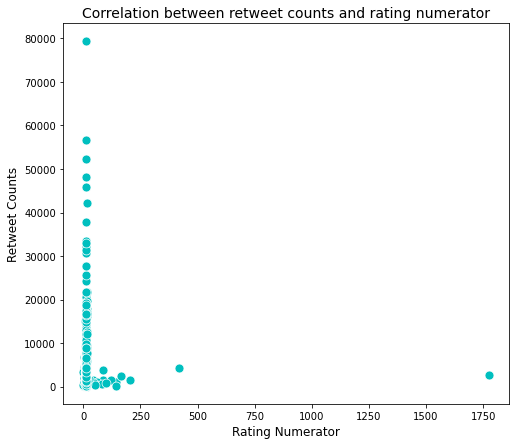

In [20]:
fig, ax = plt.subplots(figsize = ( 8 , 7 )) 
sns.scatterplot(ax = ax, x='rating_numerator', y='retweet_count', data=twitter_archive_master_copy, color = 'c', s = 80);
ax.set_xlabel( "Rating Numerator" , size = 12 ) 
# Set label for y-axis 
ax.set_ylabel( "Retweet Counts" , size = 12 ) 
# Set title for plot 
ax.set_title( "Correlation between retweet counts and rating numerator" , size = 14 ) 
# Display figure 
plt.show() 

There are some outliers, so I´ll drop those values

In [21]:
# I´ll drop rating numerator values grater than 100 to see how the graph looks like:
index2 = twitter_archive_master_copy.query('rating_numerator > 100').index
twitter_archive_master_copy.drop(index2, inplace = True)


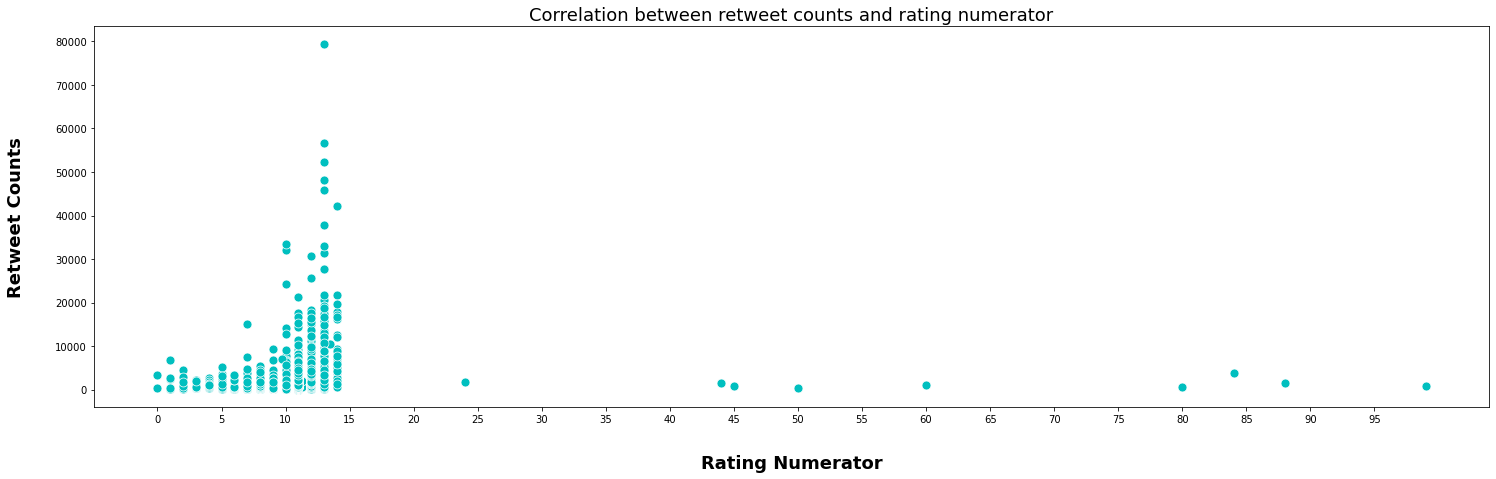

In [22]:
fig, ax = plt.subplots(figsize = ( 25 , 7 )) 
sns.scatterplot(ax = ax, x='rating_numerator', y='retweet_count', data=twitter_archive_master_copy, color = 'c', s= 80);
ax.set_xlabel( "Rating Numerator" , labelpad = 30 ,weight='bold',size = 18 ) 
# Set label for y-axis 
ax.set_ylabel( "Retweet Counts" , labelpad = 30 ,weight='bold', size = 18 ) 
# Set title for plot 
ax.set_title( "Correlation between retweet counts and rating numerator" , size = 18 ) 
plt.xticks(np.arange(0, 100, step=5))
# Display figure 
plt.show() 

In [23]:
#Since there behavior it is similar for rating numerator values grater than 25, I´ll drop values 
# grater than 25 for a better visualization
index2 = twitter_archive_master_copy.query('rating_numerator > 25').index
twitter_archive_master_copy.drop(index2, inplace = True)


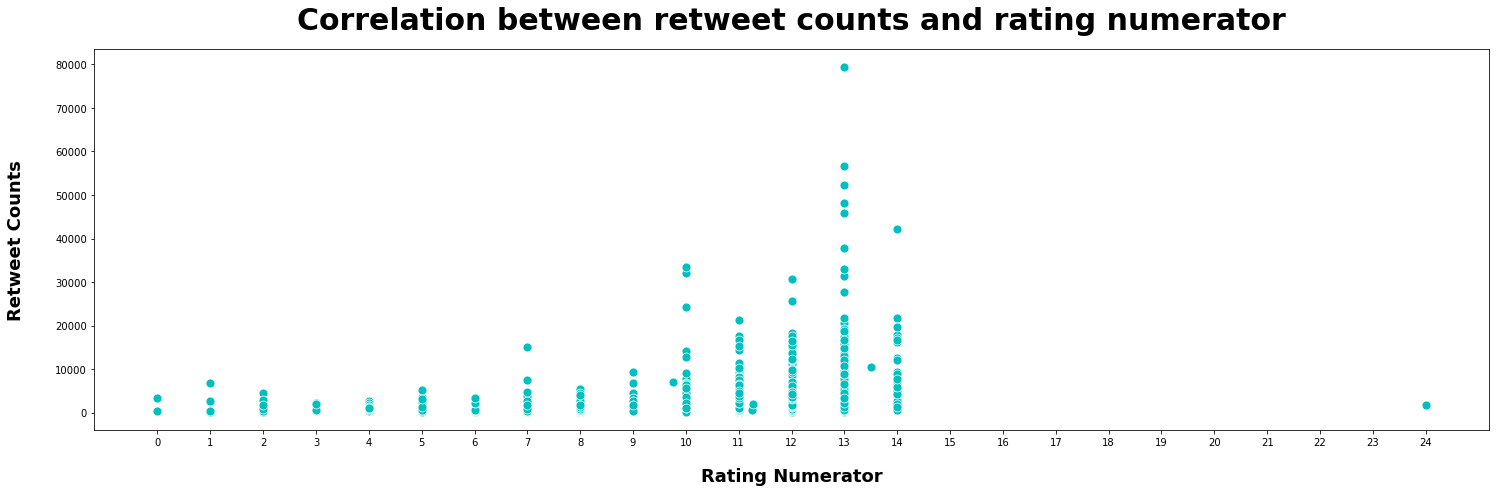

In [24]:
fig, ax = plt.subplots(figsize = ( 25 , 7 )) 
sns.scatterplot(ax = ax, x='rating_numerator', y='retweet_count', data=twitter_archive_master_copy, color = 'c', palette = 'hls', s =80);
ax.set_xlabel( "Rating Numerator" , labelpad = 20 ,weight='bold',size = 18 ) 
# Set label for y-axis 
ax.set_ylabel( "Retweet Counts" , labelpad = 30 ,weight='bold', size = 18 ) 
# Set title for plot 
ax.set_title( "Correlation between retweet counts and rating numerator" ,  weight='bold',size=30, pad = 20) 
plt.xticks(np.arange(0, 25, step=1))
# Display figure 
plt.show() 

According to the graph, when users have had shares their dog´s pictures and evaluate that picture with numerator ratings between 10-14, the "tweet" has more retweets. 

#### 3) which dogs breeds are the most retweeted?

In [1441]:
# For this insight i´ll just "just_dogs", because there are some predictions that shows that the picture doesn´t shows a dog.
breeds_more_retweeted = just_dogs.groupby('p1')['retweet_count'].mean().sort_values(ascending=False)
breeds_more_retweeted.head(25)
#breed.sort_values('retweet_count', ascending=False)
#df.groupby("state")["last_name"].count()

p1
standard_poodle            6631.857143
Afghan_hound               5976.000000
English_springer           5973.555556
Saluki                     5133.750000
Eskimo_dog                 4768.888889
Great_Pyrenees             4732.285714
French_bulldog             4683.923077
Samoyed                    4623.050000
Cardigan                   4540.588235
flat-coated_retriever      4520.250000
Irish_water_spaniel        4500.666667
Lakeland_terrier           4482.375000
Tibetan_mastiff            4193.000000
black-and-tan_coonhound    4164.500000
Mexican_hairless           3865.250000
Leonberg                   3863.666667
Labrador_retriever         3859.810526
giant_schnauzer            3849.333333
cocker_spaniel             3724.481481
golden_retriever           3612.201439
Norwegian_elkhound         3446.285714
Border_terrier             3377.142857
Irish_setter               3374.000000
basset                     3264.692308
Pembroke                   3185.988636
Name: retweet_count, d

Therefore, according to the results obtained, users who upload photos of dogs of the following breeds are more retweeted on average: 

(1) standard_poodle            
(2) Afghan_hound               
(3) English_springer           
(4) Saluki                     
(5) Eskimo_dog

In [1442]:
# If I wouldn´t had filtered the data, I would have gotten all kinds of results instead 
# of information only about dogs, since in some cases, the predictions were wrong or 
# users uploaded images that were not of dogs. 

twitter_archive_master.groupby('p1')['retweet_count'].mean().sort_values(ascending=False)


p1
Arabian_camel       19213.5
upright             18963.0
gondola             16814.0
bubble              16159.0
conch               15071.0
                     ...   
piggy_bank             92.0
pitcher                89.0
platypus               71.0
crash_helmet           45.0
desktop_computer       37.0
Name: retweet_count, Length: 373, dtype: float64